<a href="https://colab.research.google.com/github/Caroline-Camargo/TrabalhosEngenhariaDeSoftwareII/blob/main/PyTest_Engenharia_De_Software_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disciplina**: Engenharia de Software II

**Nome**: Caroline Souza Camargo e Yasmin Souza Camargo

**Link**: https://drive.google.com/file/d/1B8y3Ozb5zU_JVCqOZ8dUl3bQZqWzWnNn/view?usp=sharing

#Test Driven Development (TDD)

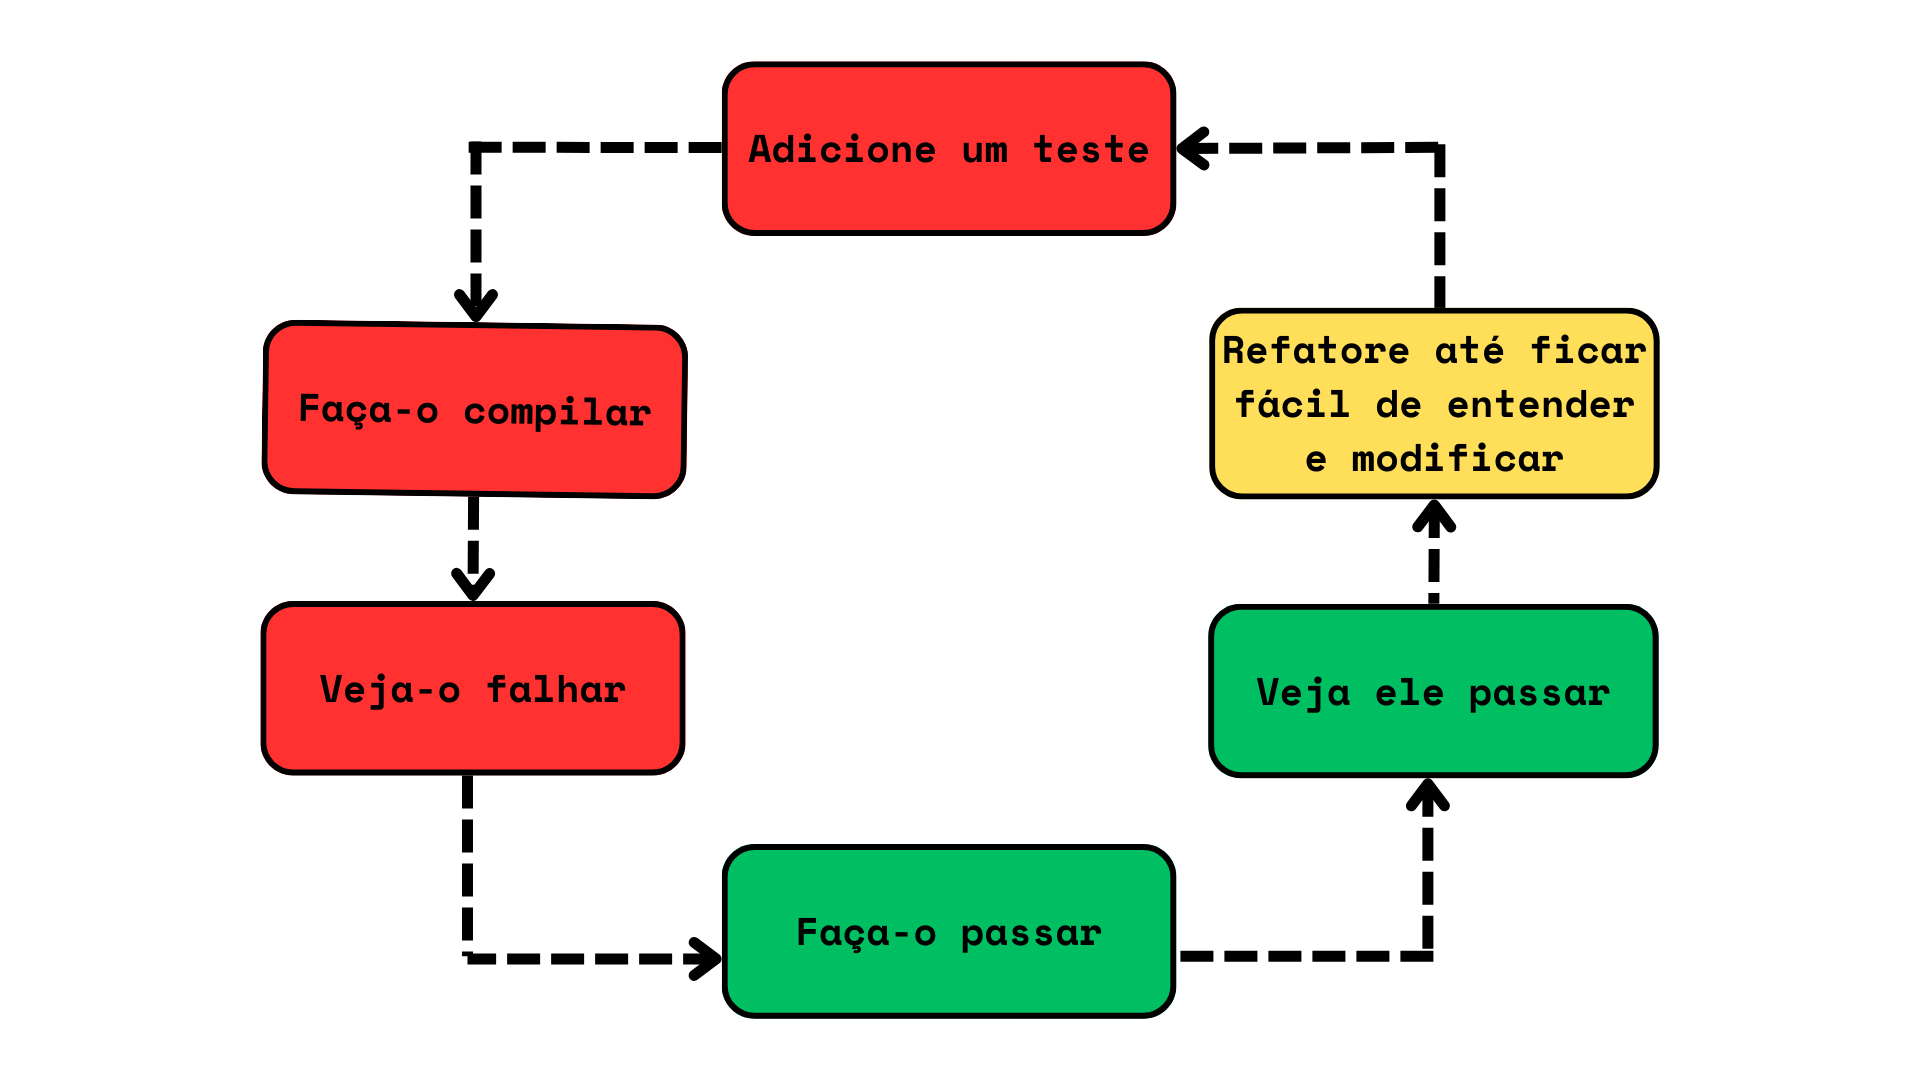

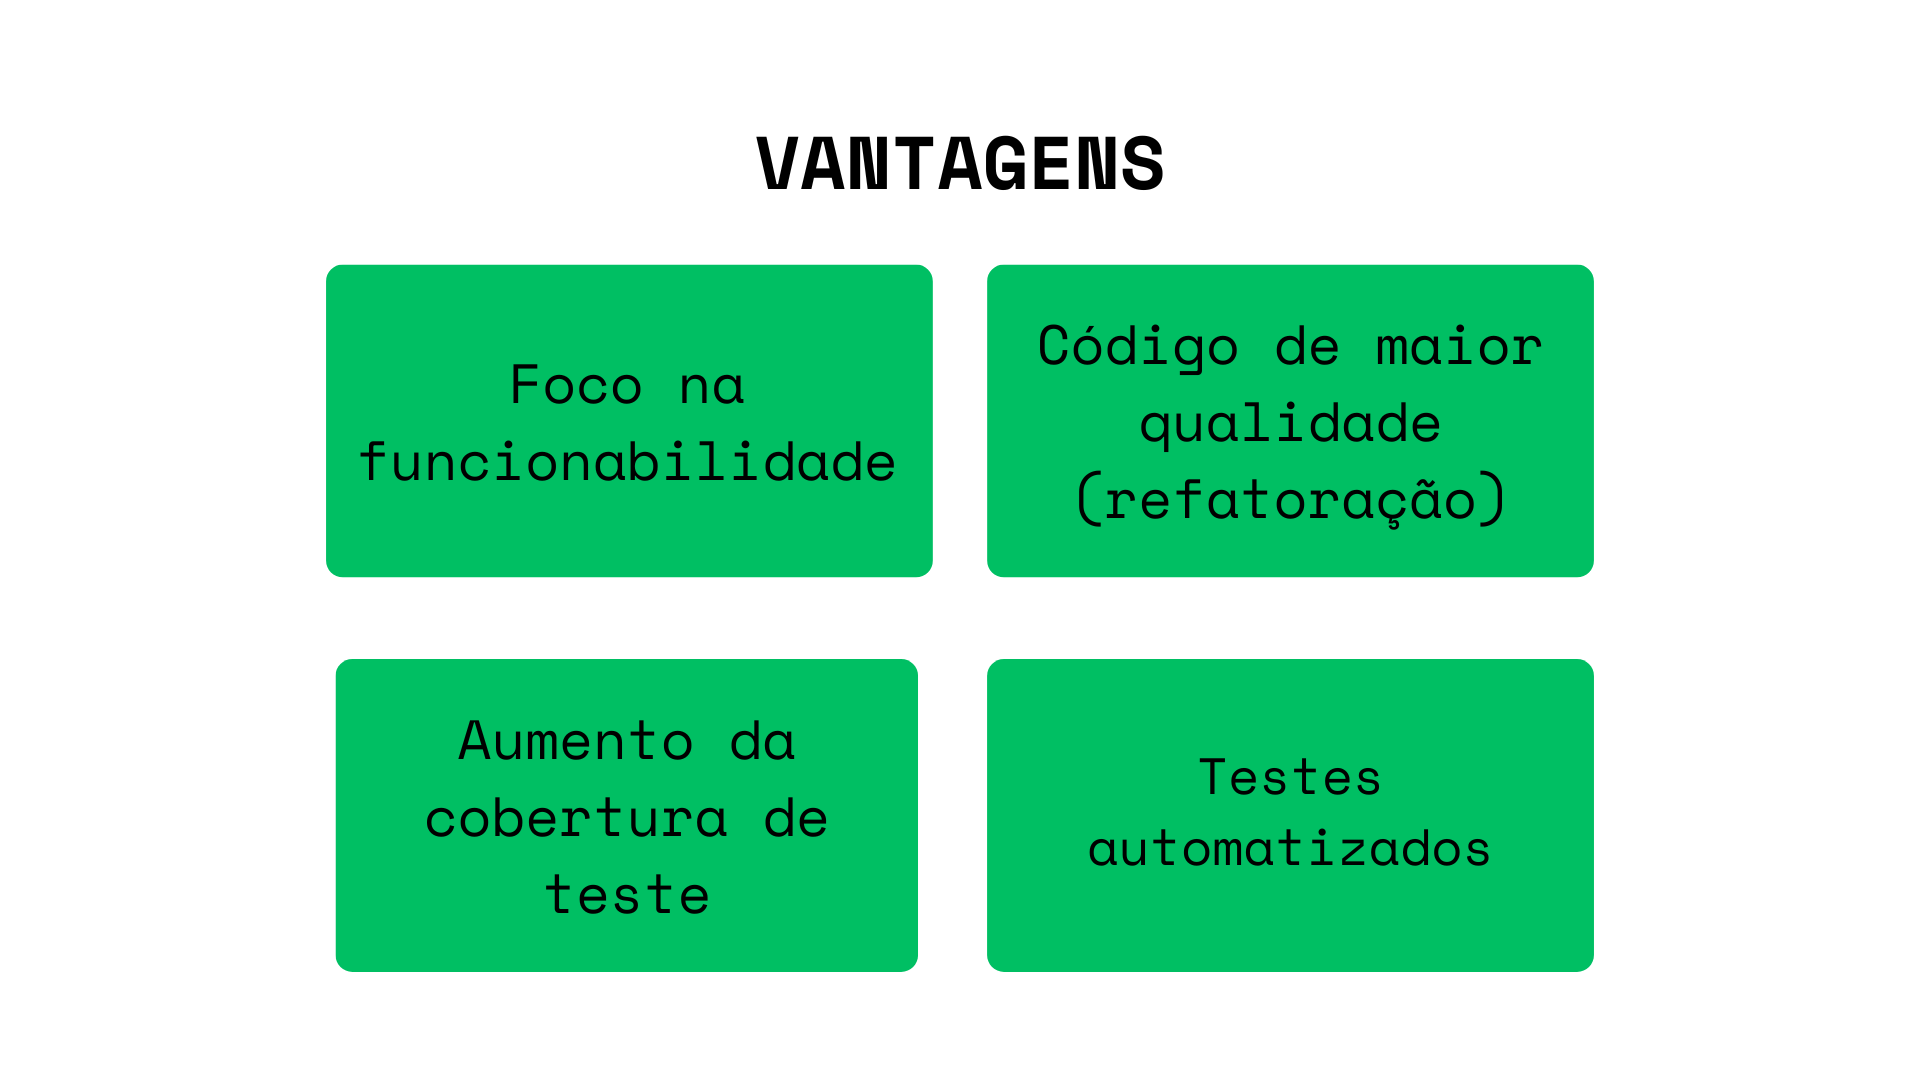

#  Explorando Ferramentas de Teste de Software

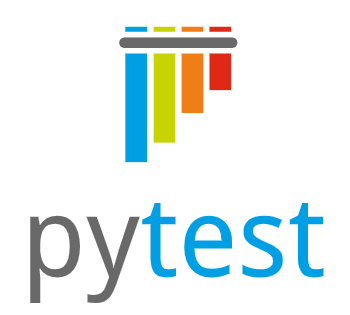

Ferramentas de teste são importantes porque ajudam a encontrar e corrigir erros no código de forma rápida e eficiente, garantindo qualidade e confiabilidade. O *pytest* é uma ferramenta para escrever e executar testes em código Python.

Documentação oficial do pytest: https://docs.pytest.org/en/latest/

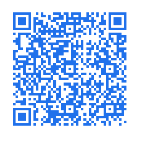



---



### Vantagens 👍
*   Simplicidade e facilidade de uso: permite que desenvolvedores escrevam testes de forma rápida e eficiente.
*   Flexibilidade: permite testar uma ampla variedade de cenários e integrar-se facilmente a outras ferramentas e frameworks.
*   Suporte a testes parametrizados e fixtures, facilitando a reutilização de código de teste.

### Desvantagens 👎
*   Alguns recursos avançados podem ser complexos de dominar.
*   Pode ser menos adequado para projetos que exigem velocidade extrema de execução de testes.

# Instalação ⚙️

In [1]:
!pip install pytest

In [2]:
!pytest --version

pytest 7.4.4


# Utilização ▶️

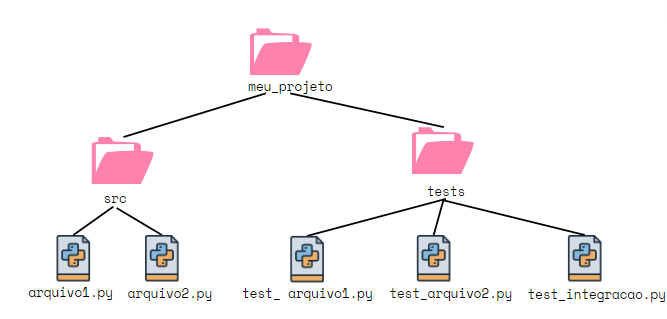


*   Executar testes em um arquivo específico: `pytest test_arquivo1.py`
*   Executar todos testes: `pytest`

# Exemplo 1 👩🏻‍💻

Pytest usando uma classe de manipulação de strings

In [3]:
%%writefile manipulador_de_strings.py

class ManipuladorDeStrings:
    def inverter(self, string: str) -> str:
        return string[::-1]

    def maiusculo(self, string: str) -> str:
        return string.upper()
        #return string.lower()


    def palindromo(self, string: str) -> bool:
        return string == string[::-1]

Writing manipulador_de_strings.py


## Casos de Teste para os Métodos da Classe `ManipuladorDeStrings`


| Método       | Entrada  | Saída Esperada | Descrição                                     |
|--------------|----------|----------------|-----------------------------------------------|
| `inverter`   | "olá"    | "álo"          | Inversão simples de uma string.                |
| `inverter`   | "12345"  | "54321"        | Inversão de uma string numérica.               |
| `inverter`   | "w"      | "w"            | Inversão de uma string de um único caractere.  |
| `inverter`   | ""       | ""             | Inversão de uma string vazia.                  |
| `maiusculo`  | "olá"    | "OLÁ"          | Conversão para maiúsculas de uma string.        |
| `maiusculo`  | "mundo"  | "MUNDO"        | Conversão para maiúsculas de uma string.        |
| `maiusculo`  | "123abc" | "123ABC"       | Conversão para maiúsculas de uma string alfanumérica. |
| `maiusculo`  | ""       | ""             | Conversão para maiúsculas de uma string vazia.  |
| `palindromo` | "arara"  | True           | Verificação de palíndromo em uma string.        |
| `palindromo` | "radar"  | True           | Verificação de palíndromo em uma string.        |
| `palindromo` | "olá"    | False          | Verificação de não palíndromo em uma string.    |
| `palindromo` | ""       | True           | Verificação de palíndromo em uma string vazia.  |


In [4]:
%%writefile test_manipulador_de_strings.py

import pytest
from manipulador_de_strings import ManipuladorDeStrings


def test_maiusculo():
    assert ManipuladorDeStrings().maiusculo("123abC") == "123ABC"
    assert ManipuladorDeStrings().maiusculo("") == ""
    assert ManipuladorDeStrings().maiusculo("olá") == "OLÁ"
    assert ManipuladorDeStrings().maiusculo("mundo") == "MUNDO"


# ---- teste inverter ----
@pytest.fixture
def manipulador_de_strings():
    return ManipuladorDeStrings()

def test_inverter(manipulador_de_strings):
    assert manipulador_de_strings.inverter("olá") == "álo"
    assert manipulador_de_strings.inverter("12345") == "54321"
    assert manipulador_de_strings.inverter("w") == "w"
    assert manipulador_de_strings.inverter("") == ""


# ---- teste palindromo ----
@pytest.mark.parametrize("input_str, expected", [
    ("arara", True),
    ("radar", True),
    ("olá", False),
    ("", True)
])

def test_palindromo(manipulador_de_strings, input_str, expected):
    assert manipulador_de_strings.palindromo(input_str) == expected


Writing test_manipulador_de_strings.py


**Fixtures**: O pytest usa fixtures para fornecer um objeto configurado antes de um teste.

**Testes parametrizados**: O pytest permite definir múltiplos conjuntos de parâmetros para um único teste. Ajudando a evitar repetição de código

In [5]:
!pytest

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 6 items                                                                                  

test_manipulador_de_strings.py ......                                                        [100%]

======================================== 6 passed in 0.06s =========================================


### Cobertura de Testes
Coverage.py é uma ferramenta para medir a cobertura do código Python, ou seja, quão bem os testes exercitam o código

In [6]:
!pip install coverage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.1 MB/s eta 0:00:00


In [7]:
!coverage run -m pytest

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 6 items                                                                                  

test_manipulador_de_strings.py ......                                                        [100%]

======================================== 6 passed in 0.03s =========================================


In [8]:
!coverage report

Name                             Stmts   Miss  Cover
----------------------------------------------------
manipulador_de_strings.py            7      0   100%
test_manipulador_de_strings.py      18      0   100%
----------------------------------------------------
TOTAL                               25      0   100%


# Exemplo II 🖥 🖱

 **PyTest para validação de dados**

 Antes de treinar um modelo de aprendizado de máquina não deve se esquecer da etapa de validação de dados, ou seja, verificar se os dados coletados estão corretos e utilizáveis

In [9]:
%%writefile data_validation.py

import pandas as pd
from sklearn import datasets

def carregar_dataset():
    iris = datasets.load_iris()
    data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    return data

def remover_linhas_duplicadas(df):
    return df.drop_duplicates()

def main():
    df = carregar_dataset()
    df = remover_linhas_duplicadas(df)
    return df

if __name__ == "__main__":
    main()


Writing data_validation.py


In [10]:
%%writefile test_data_validation.py

import pytest
import data_validation
import pandas as pd

@pytest.fixture
def df():
    return data_validation.carregar_dataset()

def test_dataframe_nao_vazio(df):
    assert isinstance(df, pd.DataFrame), "O objeto retornado não é um DataFrame"
    assert not df.empty, "O DataFrame está vazio após carregar o dataset"

def test_validacao_sem_linhas_duplicadas(df):
    df_sem_duplicatas = data_validation.remover_linhas_duplicadas(df)
    assert df_sem_duplicatas.duplicated().sum() == 0, "Existem linhas duplicadas no DataFrame"

def test_validacao_sem_valores_nulos(df):
    assert df.isnull().sum().sum() == 0, "Existem valores nulos no DataFrame"

def test_validacao_tipos_corretos(df):
    for coluna in df.columns:
        assert df[coluna].dtype == 'float64', f"A coluna '{coluna}' não é do tipo float64"

def test_validacao_sem_colunas_constantes(df):
    constantes = [col for col in df.columns if df[col].nunique() == 1]
    assert len(constantes) == 0, "Existem colunas constantes no DataFrame"


Writing test_data_validation.py


In [11]:
!pytest test_data_validation.py --verbose

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 5 items                                                                                  

test_data_validation.py::test_dataframe_nao_vazio PASSED                                     [ 20%]
test_data_validation.py::test_validacao_sem_linhas_duplicadas PASSED                         [ 40%]
test_data_validation.py::test_validacao_sem_valores_nulos PASSED                             [ 60%]
test_data_validation.py::test_validacao_tipos_corretos PASSED                                [ 80%]
test_data_validation.py::test_validacao_sem_colunas_constantes PASSED                        [100%]

======================================== 5 passed in 4.42s =========================================
